![rmotr](https://user-images.githubusercontent.com/7065401/52071918-bda15380-2562-11e9-828c-7f95297e4a82.png)
<hr style="margin-bottom: 40px;">

<img src="https://user-images.githubusercontent.com/7065401/55482509-12ad2480-55fb-11e9-9bca-ea2281b69c27.png"
    style="width:400px; float: right; margin: 0 40px 40px 40px;"></img>

# Modelling

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils import plot_confusion_matrix

%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.float_format', '{:,.3f}'.format)

In [3]:
sns.set_palette('Paired')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

In [6]:
df = pd.read_csv('data/cleaned_dataset_2.csv', index_col='customerID')

df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,Churn,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No internet service,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,1,0,1,0,0,0,1,0,0,0,0,1,29.850,False,1,0,1,0,0,1,0,0,0,0,1,0
5575-GNVDE,0,0,0,34,1,0,1,0,1,0,0,0,0,56.950,False,0,1,1,0,0,0,1,0,0,0,0,1
3668-QPYBK,0,0,0,2,1,0,1,1,0,0,0,0,1,53.850,True,0,1,1,0,0,1,0,0,0,0,0,1
7795-CFOCW,0,0,0,45,0,0,1,0,1,1,0,0,0,42.300,False,0,1,1,0,0,0,1,0,1,0,0,0
9237-HQITU,0,0,0,2,1,0,0,0,0,0,0,0,1,70.700,True,1,0,0,1,0,1,0,0,0,0,1,0


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Scale numeric data columns

In [5]:
df['tenure'] = (df['tenure'] - df['tenure'].mean()) / df['tenure'].std()
df['MonthlyCharges'] = (df['MonthlyCharges'] - df['MonthlyCharges'].mean()) / df['MonthlyCharges'].std()

df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,Churn,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No internet service,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,1,0,-1.277,0,0,0,1,0,0,0,0,1,-1.160,False,1,0,1,0,0,1,0,0,0,0,1,0
5575-GNVDE,0,0,0,0.066,1,0,1,0,1,0,0,0,0,-0.260,False,0,1,1,0,0,0,1,0,0,0,0,1
3668-QPYBK,0,0,0,-1.237,1,0,1,1,0,0,0,0,1,-0.363,True,0,1,1,0,0,1,0,0,0,0,0,1
7795-CFOCW,0,0,0,0.514,0,0,1,0,1,1,0,0,0,-0.746,False,0,1,1,0,0,0,1,0,1,0,0,0
9237-HQITU,0,0,0,-1.237,1,0,0,0,0,0,0,0,1,0.197,True,1,0,0,1,0,1,0,0,0,0,1,0


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Exporting the cleaned Dataset

In [9]:
df.to_csv('data/cleaned_dataset_3.csv')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Split dataset into train and test partitions

In [10]:
# Labels
y = df['Churn']

# Features
X = df.drop(columns=['Churn'])

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5634, 26) (5634,)
(1409, 26) (1409,)


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Logistic Regression model

In [12]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(solver='lbfgs')

model_lr.fit(X_train, y_train)

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [13]:
y_pred = model_lr.predict(X_test)

pd.Series(y_pred).value_counts()

False    1088
True      321
dtype: int64

In [14]:
score = model_lr.score(X_test, y_test)

score

0.8076650106458482

Normalized confusion matrix
[[0.88501414 0.11498586]
 [0.42816092 0.57183908]]


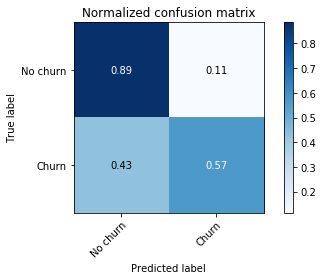

<Figure size 1296x576 with 0 Axes>

In [15]:
plot_confusion_matrix(y_test,
                      y_pred,
                      classes=['No churn', 'Churn'],
                      normalize=True,
                      title='Normalized confusion matrix')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Support Vector Machines model

In [16]:
from sklearn.svm import SVC

model_svm = SVC(gamma=0.3, probability=True)

model_svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.3, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [17]:
y_pred = model_svm.predict(X_test)

pd.Series(y_pred).value_counts()

False    1221
True      188
dtype: int64

In [18]:
score = model_svm.score(X_test, y_test)

score

0.7998580553584103

Normalized confusion matrix
[[0.94250707 0.05749293]
 [0.63505747 0.36494253]]


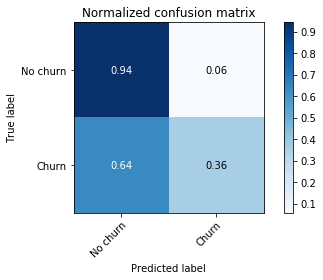

<Figure size 1296x576 with 0 Axes>

In [19]:
plot_confusion_matrix(y_test,
                      y_pred,
                      classes=['No churn', 'Churn'],
                      normalize=True,
                      title='Normalized confusion matrix')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Random Forest model

In [20]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=600)

model_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [21]:
y_pred = model_rf.predict(X_test)

pd.Series(y_pred).value_counts()

False    1085
True      324
dtype: int64

In [22]:
score = model_rf.score(X_test, y_test)

score

0.7899219304471257

Normalized confusion matrix
[[0.87181904 0.12818096]
 [0.45977011 0.54022989]]


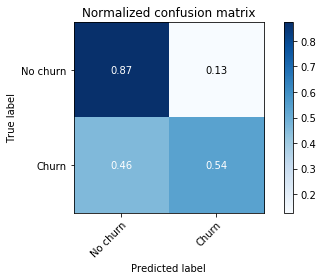

<Figure size 1296x576 with 0 Axes>

In [23]:
plot_confusion_matrix(y_test,
                      y_pred,
                      classes=['No churn', 'Churn'],
                      normalize=True,
                      title='Normalized confusion matrix')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Multilayer perceptron model

In [24]:
from sklearn.neural_network import MLPClassifier

model_mlp = MLPClassifier(max_iter=30)

model_mlp.fit(X_train, y_train)

/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=30, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [25]:
y_pred = model_mlp.predict(X_test)

pd.Series(y_pred).value_counts()

False    1130
True      279
dtype: int64

In [26]:
score = model_mlp.score(X_test, y_test)

score

0.8161816891412349

Normalized confusion matrix
[[0.91046183 0.08953817]
 [0.47126437 0.52873563]]


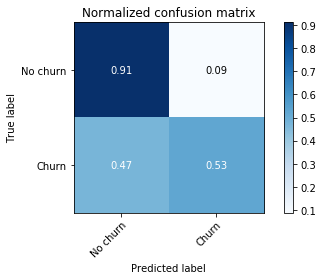

<Figure size 1296x576 with 0 Axes>

In [27]:
plot_confusion_matrix(y_test,
                      y_pred,
                      classes=['No churn', 'Churn'],
                      normalize=True,
                      title='Normalized confusion matrix')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Showing ROC curves

AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. **It tells how much model is capable of distinguishing between classes**.

Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. By analogy, Higher the AUC, better the model is.

> https://medium.com/greyatom/lets-learn-about-auc-roc-curve-4a94b4d88152

Here's a quick summary of all these terms: https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5

In [28]:
from sklearn.metrics import roc_curve, roc_auc_score

def show_ROC(model):
    probs = model.predict_proba(X_test)

    # keep probabilities for the positive only
    probs = probs[:, 1]

    # calculate AUC
    auc = roc_auc_score(y_test, probs)

    # calculate ROC curve
    # TPR (True Positive Rate) / Recall /Sensitivity
    # FPR (False Positive Rate)
    fpr, tpr, thresholds = roc_curve(y_test, probs)

    # plot the roc curve for the model
    plt.plot([0, 1], [0, 1], linestyle='--', label='_nolegend_')
    plt.plot(fpr, tpr, marker='.', ms=0.1, label='{} – {}'.format(auc.round(3), type(model).__name__))

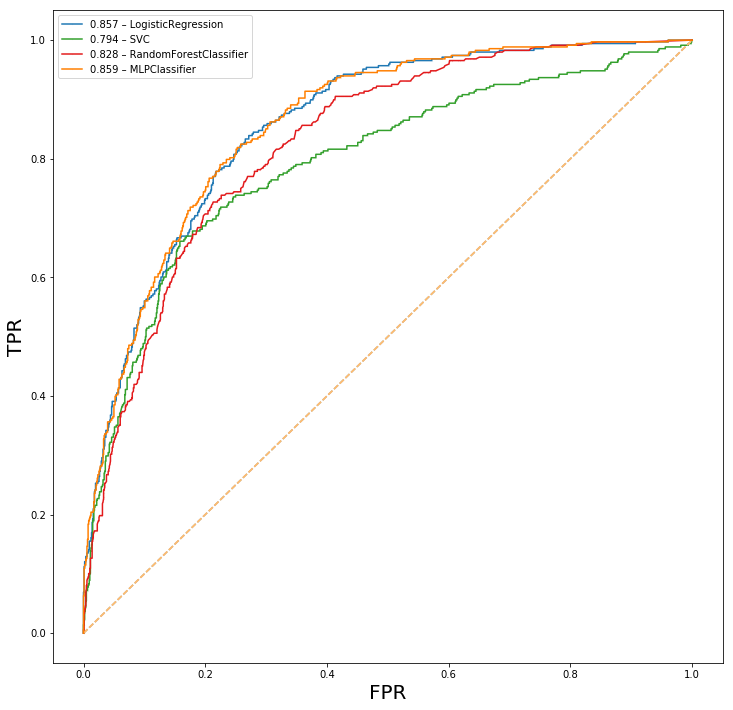

In [29]:
plt.figure(figsize=(12,12))

show_ROC(model_lr)
show_ROC(model_svm)
show_ROC(model_rf)
show_ROC(model_mlp)

plt.xlabel('FPR', fontsize=20)
plt.ylabel('TPR', fontsize=20)

plt.legend()

Investigate ROC for binary classification using this link: http://www.navan.name/roc/

In [ ]:

Pa=1
In=1
Ph=0  [MODEL] => .3 => 1
OS=1
OB=0



## Understanding the impact of the threshold

We'll now see how the threshold chosen to classify a sample, will impact in the number of false positives and false negatives, the two different cases of our "bad" predictions:
* **False Positive**: sometimes considered just a "false alarm", is a result that indicates a given condition exists, when it does not.
* **False Negative**: indicates that a condition does not hold, while in fact it does. It's usually the worst case.

The following picture illustrate the differences between them:

![main-qimg-a25c9f17379bd7b94719a77686dfb519](https://user-images.githubusercontent.com/872296/55580984-30a98080-56f2-11e9-9f85-269a405370e5.jpg)

Read more here: https://en.wikipedia.org/wiki/False_positives_and_false_negatives

Normalized confusion matrix
[[0.87181904 0.12818096]
 [0.39942529 0.60057471]]


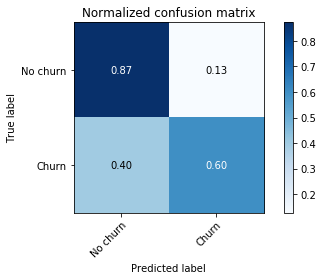

<Figure size 1296x576 with 0 Axes>

We'll reuse our `MLPClassifier` to see how changing the threshold will affect the amount of Type I and II errors:

In [30]:
from sklearn.neural_network import MLPClassifier

model_mlp = MLPClassifier(max_iter=30)

model_mlp.fit(X_train, y_train)

model_mlp.score(X_test, y_test)

/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.8048261178140526

In [31]:
y_pred = model_mlp.predict(X_test)

pd.Series(y_pred).value_counts()

False    1064
True      345
dtype: int64

In [32]:
probs_y = model_mlp.predict_proba(X_test)

In [33]:
probs_y

array([[0.90267623, 0.09732377],
       [0.9144784 , 0.0855216 ],
       [0.74683643, 0.25316357],
       ...,
       [0.9864954 , 0.0135046 ],
       [0.75987407, 0.24012593],
       [0.3274459 , 0.6725541 ]])

In [34]:
thresholds = np.round(np.arange(0, 1, .1) + .1, 2)

In [35]:
df = pd.DataFrame({'True Value': y_test.values}, index=probs_y[:,1], columns=[str(t) for t in thresholds] + ['True Value'])

In [36]:
df.head()

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,True Value
0.097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
0.086,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
0.253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
0.484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
0.215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [43]:
n = df.shape[0]

In [37]:
for threshold in thresholds:
    df[str(threshold)] = df.index >= threshold

In [39]:
df.head()

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,True Value
0.097,False,False,False,False,False,False,False,False,False,False,False
0.086,False,False,False,False,False,False,False,False,False,False,False
0.253,True,True,False,False,False,False,False,False,False,False,False
0.484,True,True,True,True,False,False,False,False,False,False,True
0.215,True,True,False,False,False,False,False,False,False,False,False


### Score for multiple thresholds:

In [44]:
(df['0.4'] == df['True Value']).sum() / n

0.7863733144073811

In [45]:
(df['0.5'] == df['True Value']).sum() / n

0.8048261178140526

In [46]:
(df['0.6'] == df['True Value']).sum() / n

0.8133427963094393

Confusion matrix:

Normalized confusion matrix
[[0.87181904 0.12818096]
 [0.39942529 0.60057471]]


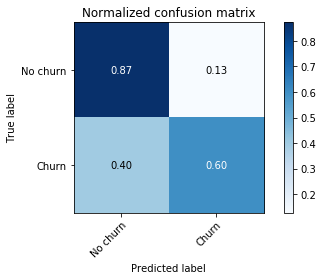

<Figure size 1296x576 with 0 Axes>

In [38]:
plot_confusion_matrix(y_test,
                      y_pred,
                      classes=['No churn', 'Churn'],
                      normalize=True,
                      title='Normalized confusion matrix')

### Finding FPs and FNs:

In [47]:
true_negative_values = df.loc[df['True Value'] == False]

In [48]:
true_positive_values = df.loc[df['True Value'] == True]

In [49]:
true_negative_values.head()

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,True Value
0.097,False,False,False,False,False,False,False,False,False,False,False
0.086,False,False,False,False,False,False,False,False,False,False,False
0.253,True,True,False,False,False,False,False,False,False,False,False
0.215,True,True,False,False,False,False,False,False,False,False,False
0.155,True,False,False,False,False,False,False,False,False,False,False


**Score:**

In [50]:
(df['0.5'] == df['True Value']).sum() / n

0.8048261178140526

**False Positives:**

In [51]:
true_negative_values.loc[true_negative_values['0.5'] == True].shape[0] / true_negative_values.shape[0]

0.1281809613572102

**False Negatives:**

In [52]:
true_positive_values.loc[true_positive_values['0.5'] == False].shape[0] / true_positive_values.shape[0]

0.3994252873563218

Comparing multiple thresholds for FPs and FNs:

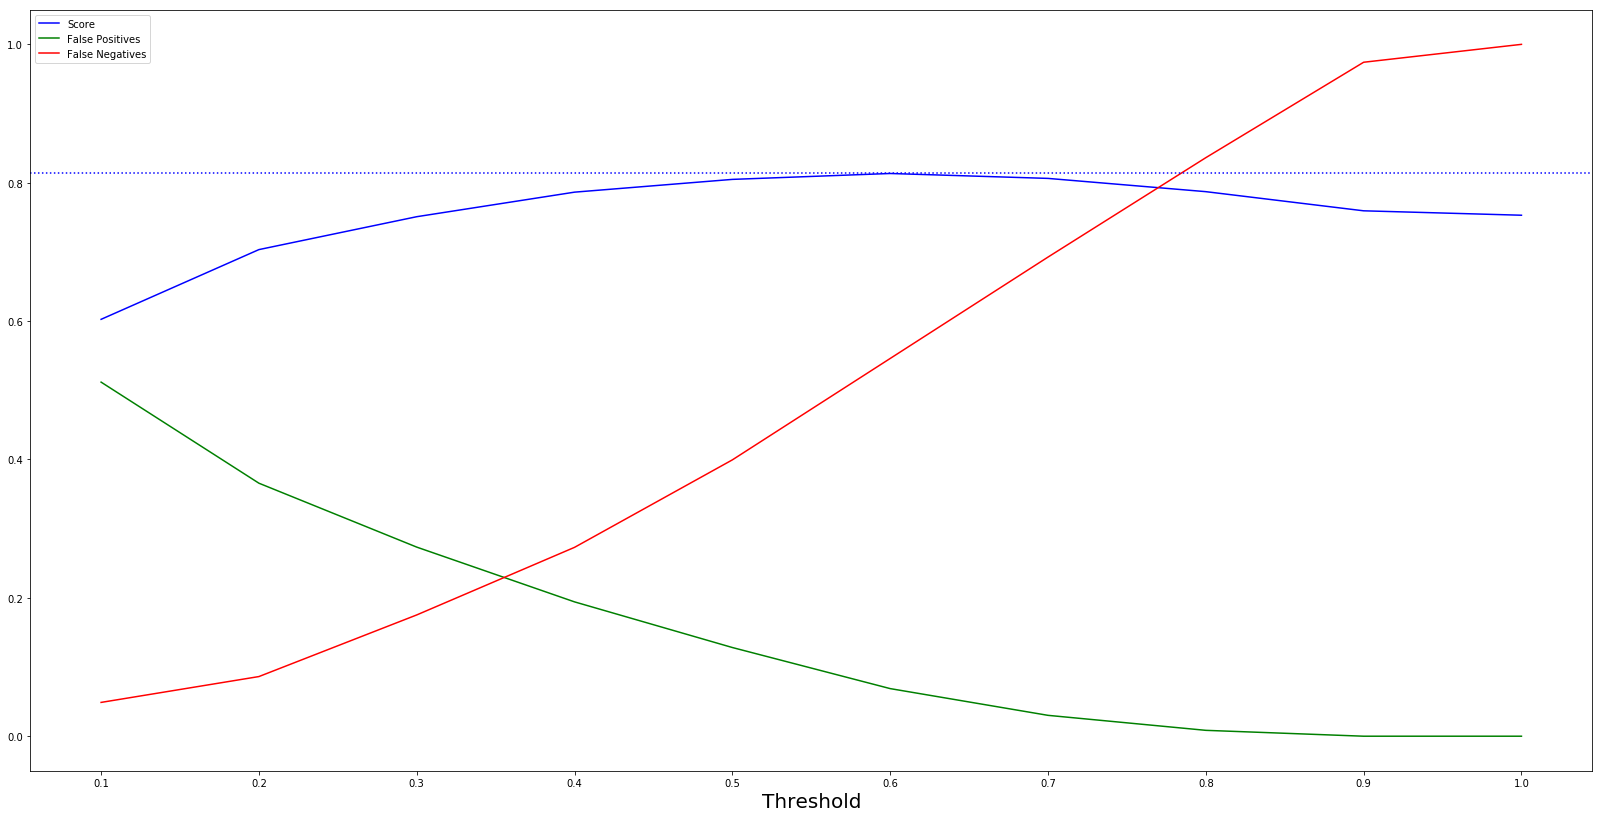

In [53]:
plt.figure(figsize=(28, 14))
threshold_labels = [str(t) for t in thresholds]

scores = [
    (df[th] == df['True Value']).sum() / n
    for th in threshold_labels
]

false_positives = [
    true_negative_values.loc[true_negative_values[th] == True].shape[0] / true_negative_values.shape[0]
    for th in threshold_labels
]

false_negatives = [
    true_positive_values.loc[true_positive_values[th] == False].shape[0] / true_positive_values.shape[0]
    for th in threshold_labels
]


plt.plot(threshold_labels, scores, 'b', label='Score')
plt.plot(threshold_labels, false_positives, 'g', label='False Positives')
plt.plot(threshold_labels, false_negatives, 'r',label='False Negatives')
plt.axhline(max(scores), color='b', linestyle=':')
plt.xlabel('Threshold', fontsize=20)

plt.legend()

plt.savefig('score.png')

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)